XGBoost for Churn Prediction

For our next model, we explore XGBoost (Extreme Gradient Boosting) a powerful and widely used gradient boosting algorithm known for its performance and efficiency.

XGBoost is especially effective for structured/tabular data and handles class imbalance, missing values, and overfitting better than many traditional models. It also offers built-in regularization and parallel processing, making it a strong candidate for churn prediction tasks.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns 
import pickle 
import matplotlib.pyplot as plt 


We begin by importing all the necessary Python libraries for building and evaluating our XGBoost model.

- pandas, numpy – for data manipulation and numerical operations

- matplotlib, seaborn – for data visualization

- scikit-learn (sklearn) – for model building, evaluation metrics, preprocessing, and cross-validation

- imblearn – to apply SMOTE for handling class imbalance

- xgboost – to build the XGBoost classifier

- pickle – for saving and loading the trained model

In [3]:
# creating dataframe 

df = pd.read_csv('telecom_net_churn.csv')
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn_Values,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Grouped_1 - 12,Tenure_Grouped_13 - 24,Tenure_Grouped_25 - 36,Tenure_Grouped_37 - 48,Tenure_Grouped_49 - 60,Tenure_Grouped_61 - 72
0,0,0,29,29,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56,1889,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53,108,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42,1840,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70,151,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [4]:
df = df.drop('Unnamed: 0',axis = 1)
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn_Values,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Grouped_1 - 12,Tenure_Grouped_13 - 24,Tenure_Grouped_25 - 36,Tenure_Grouped_37 - 48,Tenure_Grouped_49 - 60,Tenure_Grouped_61 - 72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


We remove the 'Unnamed: 0' column, which was automatically generated during the CSV export and holds no useful information for modeling

In [5]:
x =df.drop('Churn_Values',axis = 1)
y = df['Churn_Values']

We separate the dataset into:

- x: all independent variables (features)

- y: the target variable Churn_Values, which indicates whether a customer churned or not.



In [6]:
# train / validate / test split 

#15 percent testing data 

x_temp,x_test,y_temp,y_test = train_test_split(x,y,test_size=0.15,random_state=42,stratify=y)

# 20 percent validating data

x_train,x_val,y_train,y_val = train_test_split(x_temp,y_temp,test_size=0.2,random_state= 42,stratify=y_temp)

For this model, we split the data into training, validation, and test sets, using the stratify parameter which we did not apply in our earlier models like Decision Tree, Random Forest, or Logistic Regression.

Why stratification?

Stratification ensures that the proportion of churners (class 1) and non-churners (class 0) is preserved across all splits training, validation, and test. This is especially important for imbalanced datasets, like ours, where churners are fewer than non-churners.

By using stratify=y during the split:

- Each subset (train/val/test) maintains a similar class distribution.
- The model gets a more realistic and consistent view of the data
- It helps avoid skewed evaluation results due to class imbalance in any one set.

In [7]:
#Baseline testing before moving to smote 
baseline_xg = XGBClassifier(random_state = 42)
baseline_xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [8]:
cv_auc_baseline_xg = cross_val_score(baseline_xg,x_train,y_train,cv = 5,scoring = 'roc_auc')
print('Cross validation auc -',cv_auc_baseline_xg.mean())

Cross validation auc - 0.8203777996830336


Before applying SMOTE or tuning the model, we trained a basic XgBoost Tree classifier on the original imbalanced dataset. Using 5-fold cross-validation with ROC AUC as the evaluation metric, the model achieved an average AUC score of 0.8203

In [9]:
# apply smote only on training data 

smote = SMOTE(random_state=42)
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

To address the class imbalance in our dataset where churners (class 1) are significantly fewer than non-churners (class 0) we applied SMOTE (Synthetic Minority Oversampling Technique) on the training data.

In [10]:
# Apply StandardScaler ONLY on train data 
scaler = StandardScaler()
cols_to_scale = ['MonthlyCharges', 'TotalCharges']

x_train_smote_scaled = x_train_smote.copy()
x_train_smote_scaled[cols_to_scale] = scaler.fit_transform(x_train_smote[cols_to_scale])

x_val_scaled = x_val.copy()
x_val_scaled[cols_to_scale] = scaler.transform(x_val[cols_to_scale])

x_test_scaled = x_test.copy()
x_test_scaled[cols_to_scale] = scaler.transform(x_test[cols_to_scale])

In this step, we applied feature scaling using StandardScaler, but only to the numeric columns MonthlyCharges and TotalCharges. These features vary widely in magnitude and benefit from normalization to bring them to a standard scale (mean = 0, standard deviation = 1).

We fit the scaler only on the SMOTE-balanced training data to prevent data leakage, and then applied the same transformation to the validation and test sets. This ensures consistency across all sets while keeping the evaluation fair.

In [11]:
model_xgb = XGBClassifier(use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42,
                         )

model_xgb.fit(x_train_smote_scaled, y_train_smote, 
              eval_set=[(x_val, y_val)], 
              verbose=False)


/home/sonaal/my_projects/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [19:59:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

We initialized and trained an XGBClassifier, a powerful gradient boosting algorithm known for its speed and performance on structured data. Key configurations used during training:

- use_label_encoder=False avoids unnecessary warnings from older versions.

- eval_metric='logloss' tracks the model’s performance using log loss.

- random_state=42 ensures reproducibility.

In [12]:
# Validation Result

val_prediction = model_xgb.predict(x_val_scaled)
val_prob = model_xgb.predict_proba(x_val_scaled)[:,1]

print('Validation Result')
print('Validation Accuracy :',model_xgb.score(x_val_scaled,y_val))
print('Validation ROC AUC:',roc_auc_score(y_val,val_prob))
print('Validation Recall Score :',recall_score(y_val,val_prediction))
print('Validation Classification Report : \n', classification_report(y_val,val_prediction))

Validation Result
Validation Accuracy : 0.7750836120401338
Validation ROC AUC: 0.7986042463575022
Validation Recall Score : 0.449685534591195
Validation Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       878
           1       0.60      0.45      0.52       318

    accuracy                           0.78      1196
   macro avg       0.71      0.67      0.68      1196
weighted avg       0.76      0.78      0.76      1196



After training the XGBoost model on SMOTE-balanced training data and applying scaling to key numerical features, the model was evaluated on the validation set.

Validation Accuracy: 77.5%
The model correctly predicted the churn status for approximately 77.5% of the customers.

ROC AUC Score: 0.7986
This shows the model has a decent ability to distinguish between churners and non-churners, but slightly lower than other models evaluated.

Recall (Churn Class): 44.9%
The model was able to detect only about 45% of actual churners, which is lower than desired in churn prediction tasks where recall is critical.

Precision (Churn Class): 60%
Among the customers predicted as churners, 60% were actually churners.

F1-Score (Churn Class): 52%
This reflects a moderate balance between precision and recall, but indicates there’s room to improve churn capture.

Overall, while the XGBoost model performs reasonably well on non-churn predictions, its lower recall on churners suggests that further tuning or ensemble strategies may be needed to better capture high-risk customers

Improving XGBoost Model Performance

In [13]:
threshold  = 0.35
val_prediction_custom = (val_prediction >= threshold).astype(int) 


print(f"Evaluation at Threshold = {threshold}")
print("Accuracy:", accuracy_score(y_val, val_prediction_custom))
print("ROC AUC:", roc_auc_score(y_val, val_prob))
print("Recall:", recall_score(y_val, val_prediction_custom))
print("Classification Report:\n", classification_report(y_val, val_prediction_custom))

Evaluation at Threshold = 0.35
Accuracy: 0.7750836120401338
ROC AUC: 0.7986042463575022
Recall: 0.449685534591195
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       878
           1       0.60      0.45      0.52       318

    accuracy                           0.78      1196
   macro avg       0.71      0.67      0.68      1196
weighted avg       0.76      0.78      0.76      1196



To improve recall (sensitivity to actual churners), we tried adjusting the classification threshold from the default 0.5 to 0.35, Despite lowering the threshold, there was no improvement in recallit remained at 44.9%, indicating that the model may be fundamentally limited in its ability to detect churners with the current configuration.

#Now trying RandomizedSearchCV to improve performance after validation testing

In [14]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3]
}


xgb_for_tuning = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)


random_search = RandomizedSearchCV(
    estimator=xgb_for_tuning,
    param_distributions=param_dist,
    n_iter=30,
    scoring='recall',  
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train_smote, y_train_smote)


# Get best model
tuned_xgb_model = random_search.best_estimator_

train_pred_tuned = tuned_xgb_model.predict(x_train_smote)
train_prob_tuned = tuned_xgb_model.predict_proba(x_train_smote)[:, 1]

print("Training ROC AUC:", roc_auc_score(y_train_smote, train_prob_tuned))




Fitting 5 folds for each of 30 candidates, totalling 150 fits


Training ROC AUC: 0.9068334266767315


In [15]:
# Evaluate on validation set
val_pred_tuned = tuned_xgb_model.predict(x_val_scaled)
val_prob_tuned = tuned_xgb_model.predict_proba(x_val_scaled)[:, 1]

print("Validation Accuracy (Tuned):", tuned_xgb_model.score(x_val_scaled, y_val))
print("Validation ROC AUC (Tuned):", roc_auc_score(y_val, val_prob_tuned))
print("Validation Recall (Tuned):", recall_score(y_val, val_pred_tuned))
print("Classification Report (Tuned):\n", classification_report(y_val, val_pred_tuned))

Validation Accuracy (Tuned): 0.7023411371237458
Validation ROC AUC (Tuned): 0.8131652841649833
Validation Recall (Tuned): 0.8270440251572327
Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.91      0.66      0.76       878
           1       0.47      0.83      0.60       318

    accuracy                           0.70      1196
   macro avg       0.69      0.74      0.68      1196
weighted avg       0.79      0.70      0.72      1196



To improve the model’s ability to detect churners, a RandomizedSearchCV approach was used to tune the hyperparameters of the XGBoost classifier. The goal was to maximize recall, ensuring that more actual churners are correctly identified a key priority in churn prevention.

- The recall significantly improved (from 45% to 83%), meaning the model is now much better at catching actual churners.

- However, this came at the cost of precision many non-churners are being misclassified as churners.

- Overall accuracy dropped slightly to 70%.

In [16]:
test_pred = tuned_xgb_model.predict(x_test_scaled)
test_prob = tuned_xgb_model.predict_proba(x_test_scaled)[:,1]

print('Test Score')
print('Test Accuracy :',tuned_xgb_model.score(x_test_scaled,y_test))
print('Test ROC AUC :',roc_auc_score(y_test,test_prob))
print('Test Recall Score :',recall_score(y_test,test_pred))
print('Test Classification Report : \n',classification_report(y_test,test_pred))

Test Score
Test Accuracy : 0.6767772511848341
Test ROC AUC : 0.8008271889400922
Test Recall Score : 0.825
Test Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.62      0.74       775
           1       0.44      0.82      0.58       280

    accuracy                           0.68      1055
   macro avg       0.67      0.72      0.66      1055
weighted avg       0.78      0.68      0.70      1055



After hyperparameter tuning with RandomizedSearchCV, the final XGBoost model was evaluated on the test set to assess its generalization performance on unseen data.

Test Results:

Accuracy: 67.7%
The model correctly predicted the outcome for approximately 68% of customers.

ROC AUC: 0.80
This shows that the model has a strong ability to distinguish between churners and non-churners based on predicted probabilities.

Recall (Churn class): 82.5%
This high recall indicates the model is excellent at identifying actual churners crucial for proactive retention strategies.

Precision (Churn class): 44%
While many churners are correctly identified, the lower precision means some non-churners are incorrectly flagged as churn risks (false positives).

F1-Score (Churn class): 0.58
The balance between precision and recall is moderate, acceptable for a recall-focused churn model.

The tuned XGBoost model performs well on the test set, especially in identifying churners. While there is room for improving precision, the recall score aligns with the business goal of minimizing customer loss. Overall, the model generalizes well and is a strong candidate for deployment or further business analysi

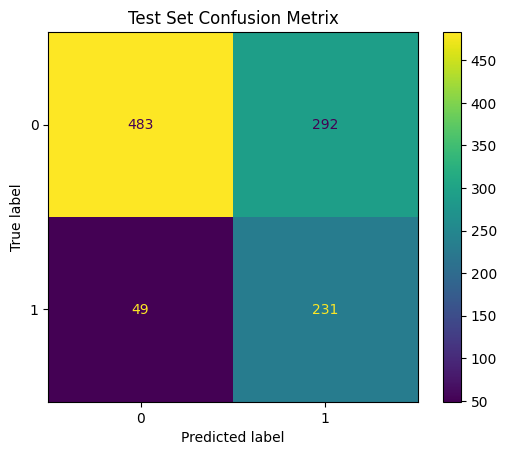

In [17]:
# plot confuion matrix and roc curve

ConfusionMatrixDisplay.from_estimator(tuned_xgb_model,x_test_scaled,y_test)
plt.title('Test Set Confusion Metrix')
plt.show()

True Negative (TN) = 483
The model correctly predicted “No Churn” when the customer actually didn’t churn.

False Positive (FP) = 292
The model wrongly predicted “Churn” when the customer actually didn’t churn (false alarm).

False Negative (FN) = 49
The model wrongly predicted “No Churn” when the customer actually churned (missed case).

True Positive (TP) = 231
The model correctly predicted “Churn” when the customer actually churned.

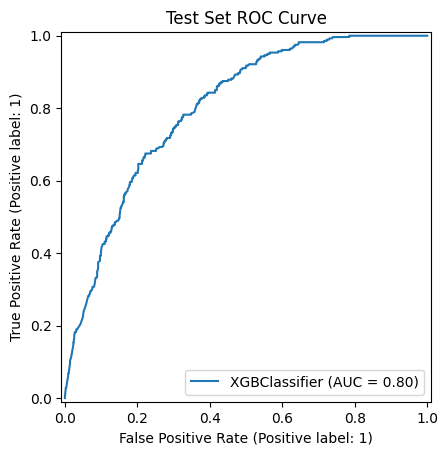

In [18]:
RocCurveDisplay.from_estimator(tuned_xgb_model,x_test_scaled,y_test)
plt.title('Test Set ROC Curve')
plt.show()

In [19]:
import pickle

with open ('xgboost_model.pkl','wb') as f:
    pickle.dump(tuned_xgb_model,f)


# saving the scaler 

with open('scaler.pkl','wb') as scaler_file:
    pickle.dump(scaler,scaler_file) 

In [20]:
#load model file 

with open('xgboost_model.pkl','rb') as f:
    xg_model_loaded = pickle.load(f)

# load scaler file 


with open('scaler.pkl','rb') as scaler_file:
    scaler_loaded = pickle.load(scaler_file)

In [21]:
# sample testing of model 

sample_data = pd.read_csv('telecom_net_churn.csv')

cols_to_scale = ['MonthlyCharges', 'TotalCharges']

#prepare dataset for features and targets

features = sample_data.drop(columns=['Unnamed: 0','Churn_Values'])
targets = sample_data['Churn_Values']

#scale using the loaded scaler

features_scaled = features.copy()
features_scaled[cols_to_scale] = scaler_loaded.transform(features[cols_to_scale])

# predict with loaded model

predicated_values = xg_model_loaded.predict(features_scaled)

# compare predicitions with actual churn 

print('classification_report : \n' , classification_report(targets,predicated_values))
print('confusion matrix : \n' , confusion_matrix(targets,predicated_values))

classification_report : 
               precision    recall  f1-score   support

           0       0.92      0.65      0.76      5163
           1       0.47      0.84      0.60      1869

    accuracy                           0.70      7032
   macro avg       0.69      0.75      0.68      7032
weighted avg       0.80      0.70      0.72      7032

confusion matrix : 
 [[3355 1808]
 [ 297 1572]]


 To assess how well the tuned XGBoost model generalizes, we tested it on the full original dataset (telecom_net_churn.csv). Before prediction, we re-applied standard scaling to the numeric columns (MonthlyCharges and TotalCharges) using the previously saved scaler.

 Model Performance:

- Accuracy: 70%
The model correctly predicted churn/non-churn for 70% of the customers overall.

- Recall (Churn): 84%
The model successfully identified 84% of actual churners, which is strong and useful for proactive retention strategies.

- Precision (Churn): 47%
Out of all customers predicted as churners, 47% were truly churners. This shows some false positives, but it's an acceptable trade-off in churn prevention.

- F1-Score (Churn): 0.60
The harmonic mean of precision and recall indicates a moderate balance between catching churners and avoiding false alarms.

- Weighted Avg F1-Score: 0.72
Reflects an overall balanced model performance, accounting for class imbalance.

Confusion Matrix Insights:

- 3355 correctly predicted non-churners

- 1808 predicted churn but were non-churners

- 297 missed churners

- 1572 correctly predicted churners



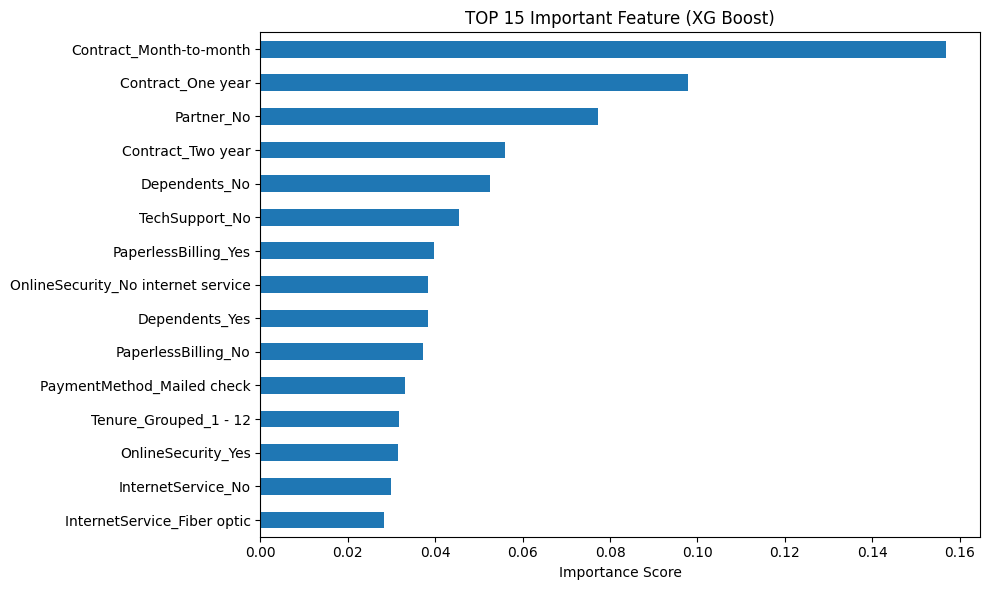

In [22]:
feature_importance = pd.Series(xg_model_loaded.feature_importances_,index = x.columns)
feature_importances = feature_importance.sort_values(ascending=False)

plt.figure(figsize = (10,6))
feature_importances.head(15).plot(kind = 'barh')
plt.title('TOP 15 Important Feature (XG Boost)')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The model found Contract Type, Tech Support, and Partner/Dependent status to be the strongest predictors of customer churn.
This helps identify key service factors and customer attributes that influence churn behavior.